In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import random
import copy

In [2]:
popSize = 40 #一世代の個体数
targetGenerations = 8000 #目標の世代数
crossoverMethod = 0 #交叉の方法 まだ手動で設定してる
selectionMethod  = 0 #淘汰の方法
mutationProbability = 0.1 #突然変異の確率
#交叉の確率を設定。90~95%くらい
cityCount = 40



mutationProbability = 0.1 #突然変異の確率


In [3]:
class Individual:
  coordinate = 0
  cityCount = 0

  def __init__(self, input=0):
    if input == 0:
      self.chromosome = list(range(Individual.cityCount))
      random.shuffle(self.chromosome)
    else:
      self.chromosome = input
    self.getFitness()
    #print(self.chromosome)

  def setDefaultCoordinate(self, input):
    Individual.coordinate = copy.deepcopy(input)
  
  def setChromosome(self, input):
    self.chromosome = input

  def getFitness(self):
    self.fitness = 0
    self.temp = []
    for j in range(len(self.chromosome)):
      self.temp.append(Individual.coordinate[self.chromosome[j]])
    #print(self.temp)
    #print(self.coordinate)

    for i in range(len(self.temp)):
      a=self.temp[i]
      if i == len(self.temp)-1:
        b=self.temp[0]
      else:
        b=self.temp[i+1]
      distance=np.linalg.norm(b-a)
      self.fitness += distance
    #print(self.fitness)

  def getChromosome(self):
    return_chromo = copy.deepcopy(self.chromosome)
    return return_chromo

In [4]:
class SelectionTest:#抽象化かインターフェースにしたい
  def selection(self,input):
    #print("start sel")
    #print("before")
    #for i in range(len(input)):
      #print(input[i].fitness)
    #print("after")
    target_leng = int(len(input)/2)
    input.sort(key=lambda x: x.fitness)
    del input[target_leng:]#参照でもらったリストを破壊的に変更
    #for i in range(len(input)):
      #print(input[i].fitness)

In [ ]:
class RouletteSelection:

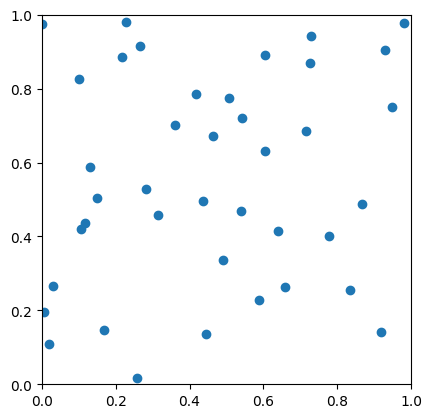

In [5]:
cityCount = 40#巡回するポイントの数
#point_list = list(range(cityCount))
xPos = np.random.rand(cityCount)#ポイントの数だけランダムな座標を生成
yPos = np.random.rand(cityCount)
#print(xPos,"\n", yPos)

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(xPos, yPos, marker = "o", linestyle = "none")#生成した座標の点のみ描画
ax.set_aspect('equal', adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)

coordinate = np.transpose(np.stack([xPos, yPos]))
#print(coordinate)
#print(coordinate[1])

In [6]:
class TestCO:#名前変えろ
  def co(self,input):
    leng = len(input)
    for i in range(0, leng, 2):
      p1 = copy.deepcopy(input[i].chromosome)
      p2 = copy.deepcopy(input[i+1].chromosome)
      ret = self.cotst1201(p1,p2)

      input.append(Individual(ret[0]))
      input.append(Individual(ret[1]))



  def cotst1201(self,input1, input2):
    #print("start co")
    p1 = copy.deepcopy(input1)
    p2 = copy.deepcopy(input2)
    c1 = [-1] * len(p1) #-1で埋めた配列を作成
    c2 = [-1] * len(p2)
    r = random.randrange(len(p1))
    #print(r)
    c1[r] = p1[r]
    c2[r] = p2[r]

    index1 = p1.index(p2[r])
    index2 = p2.index(p1[r])

    c1[index1] = p1[index1]
    c2[index2] = p2[index2]

    #print(c1)
    #print(c2)
      
    del1 = p1.pop(r)
    del2 = p2.pop(r)
    if not del1 == del2:
      p1.remove(del2)
      p2.remove(del1)

    #print(p1)
    #print(p2)
    cout1 = cout2 = 0
    for i in range(len(c1)):
    
      if c1[i] == -1:
        c1[i] = p2[cout1]
        cout1 += 1
      if c2[i] == -1:
        c2[i] = p1[cout2]
        cout2 += 1

    
    #print(c1)
    #print(c2)
    #print("end co")
    return [c1,c2]

In [7]:
class PMX:
    def co(self,input):
        leng = len(input)
        for i in range(0, leng, 2):
          p1 = copy.deepcopy(input[i].chromosome)
          p2 = copy.deepcopy(input[i+1].chromosome)
          ret = self.pmx_co(p1,p2)

          input.append(Individual(ret[0]))
          input.append(Individual(ret[1]))
    
    def pmx_co(self,input1, input2):
        #print("start co")
        copy_1 = copy.deepcopy(input1)
        copy_2 = copy.deepcopy(input2)
        new_1 = [-1] * len(copy_1)
        new_2 = [-1] * len(copy_2)

        cut_len = 3
        #cut_len = int(len(copy_1)/2)# 半分にする。可変長にするならここを変える
        cut_start_point = random.randint(0, len(copy_1) - 1) # どこから切り取るか
        #計算するたびにランダム？世代ごとにランダム？
        copy_1 = copy_1[cut_start_point:] + copy_1[:cut_start_point]#カットの始点が先頭に来るように配列を回転させる
        copy_2 = copy_2[cut_start_point:] + copy_2[:cut_start_point]
        #copy_1の0~cut_lenの要素をnew_1にコピー
        for i in range(cut_len):
            new_1[i] = copy_2[i]
            new_2[i] = copy_1[i]
        
        

        #print(cut_start_point)
        #print(new_1)
        #print(new_2)
        #ここから
        """new_1 = new_1[:cut_len]
        new_1 = new_1 + list(set(copy_1) - set(new_1))
        new_2 = new_2[:cut_len]
        new_2 = new_2 + list(set(copy_2) - set(new_2))
        ##なんかちがうよ##ここまで
        #先に衝突をしないものを同じ場所に入れる
        print(new_1)
        print(new_2)"""
        missing_indexes_1= []
        missing_indexes_2= []
        
        for i in range(len(copy_1)):#一旦重複しない要素をそのままの場所にコピー
            if new_1[i] == -1:
                #if new_1に重複する要素がなかったら
                if copy_1 [i] not in new_1:
                    new_1[i] = copy_1[i]
                else:
                    missing_indexes_1.append(i)#重複してて入れれない場所のインデックスを記録
        
        for i in range(len(missing_indexes_1)):
            for j in range(len(copy_1)):
                if copy_1[j] not in new_1:
                    new_1[missing_indexes_1[i]] = copy_1[j]
                    break


        for i in range(len(copy_2)):
            if new_2[i] == -1:
                if copy_2[i] not in new_2:
                    new_2[i] = copy_2[i]
                else:
                    missing_indexes_2.append(i)

        for i in range(len(missing_indexes_2)):
            for j in range(len(copy_2)):
                if copy_2[j] not in new_2:
                    new_2[missing_indexes_2[i]] = copy_2[j] 
                    break
                
        #print(new_1)
        #print(new_2)





        
        return [new_1, new_2]


In [8]:
def mutation_2(ind):
  new_chromo = copy.deepcopy(ind.chromosome)
  r1 = random.randint(0, len(ind.chromosome) -1)
  r2 = random.randint(0, len(ind.chromosome) -1)
  while r1 == r2:
    r2 = random.randint(0, len(ind.chromosome) -1)

  #print(r1,r2)
  temp = new_chromo[r1]
  new_chromo[r1] = new_chromo[r2]
  new_chromo[r2] = temp
  ind.setChromosome(new_chromo)
  
def mutation_ALL(ind):#壊れすぎてダメかも
  new_chromo = list(range(len(ind.chromosome)))
  random.shuffle(new_chromo)
  ind.setChromosome(new_chromo)


In [9]:
generation=[]#old 2023_09_26
plot_lst = list()
Individual.cityCount = cityCount
Individual.coordinate = copy.deepcopy(coordinate)
for i in range(popSize):
  generation.append(Individual())
#genelation[0].setDefaultCoordinate(coordinate)
#for i in range(popSize):
# genelation[i].getFitness()
min_coordinate = 100000

sel_test = SelectionTest()
#co_test = TestCO()
co_test = PMX()
cnt_m = 0
for i in range(targetGenerations):
  co_test.co(generation)
  #for i in range(len(genelation)):
    #print(i,genelation[i].fitness)
  sel_test.selection(generation)
  for j in range(popSize):
    mut_rand = random.random()
    if mut_rand < mutationProbability:
      mutation_ALL(generation[j])
      generation[j].getFitness()
      cnt_m += 1
      #print("mutation", cnt_m)
  generation.sort(key=lambda x: x.fitness)
  plot_lst.append([i,generation[0].fitness])
  if generation[0].fitness < min_coordinate:
    min_coordinate = generation[0].fitness
  random.shuffle(generation)
print("mutation",cnt_m)


mutation 31818


In [ ]:
generation=[]#copy 2023_09_26
plot_lst = list()
Individual.cityCount = cityCount
Individual.coordinate = copy.deepcopy(coordinate)
for i in range(popSize):
  generation.append(Individual())
#genelation[0].setDefaultCoordinate(coordinate)
#for i in range(popSize):
# genelation[i].getFitness()
min_coordinate = 100000

sel_test = SelectionTest()
#co_test = TestCO()
co_test = PMX()
cnt_m = 0
for i in range(targetGenerations):
  co_test.co(generation)
  #for i in range(len(genelation)):
    #print(i,genelation[i].fitness)
  sel_test.selection(generation)
  for j in range(popSize):
    mut_rand = random.random()
    if mut_rand < mutationProbability:
      mutation_ALL(generation[j])
      generation[j].getFitness()
      cnt_m += 1
      #print("mutation", cnt_m)
  generation.sort(key=lambda x: x.fitness)
  plot_lst.append([i,generation[0].fitness])
  if generation[0].fitness < min_coordinate:
    min_coordinate = generation[0].fitness
  random.shuffle(generation)
print("mutation",cnt_m)


[5, 35, 22, 30, 31, 38, 13, 36, 37, 24, 11, 12, 28, 9, 29, 0, 6, 19, 21, 20, 39, 34, 4, 3, 23, 26, 27, 18, 17, 2, 16, 15, 33, 8, 14, 1, 7, 10, 25, 32]
[[0.10510012 0.41986866]
 [0.60431285 0.63094181]
 [0.97935513 0.97792275]
 [0.44379972 0.13576685]
 [0.25835929 0.01676856]
 [0.36186409 0.7014495 ]
 [0.15009426 0.50315326]
 [0.54193886 0.72077225]
 [0.77597275 0.40223166]
 [0.31485854 0.45848644]
 [0.46441967 0.67203661]
 [0.638782   0.41597599]
 [0.53789292 0.46886781]
 [0.12959212 0.58781085]
 [0.48985408 0.3356855 ]
 [0.94668947 0.75014612]
 [0.92798675 0.90417381]
 [0.72489632 0.86927526]
 [0.72978033 0.94302257]
 [0.11634169 0.43600227]
 [0.0313444  0.26718104]
 [0.00552107 0.19490588]
 [0.26567163 0.91647557]
 [0.65823626 0.26200412]
 [0.91906204 0.14063479]
 [0.50744059 0.77572292]
 [0.71511001 0.68647779]
 [0.60524489 0.89049345]
 [0.43587568 0.49466682]
 [0.28328415 0.5279621 ]
 [0.21657829 0.88480288]
 [0.00195316 0.9743165 ]
 [0.41729725 0.78621282]
 [0.86716456 0.48781064]

(0.0, 1.0)

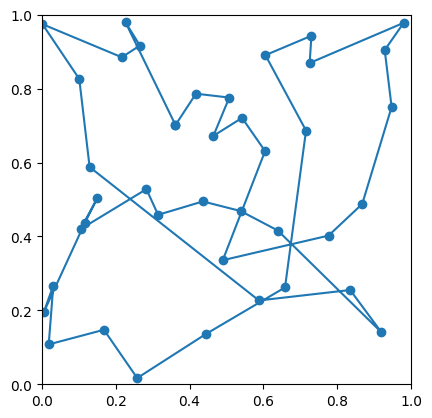

In [14]:
generation.sort(key=lambda x: x.fitness)
print(generation[0].chromosome)

ans = list()
for i in range(cityCount):
  ans.append(coordinate[generation[0].chromosome[i]])
ans.append(ans[0])

print(coordinate)
print(ans)


ans_tp = np.transpose(ans)
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(ans_tp[0],ans_tp[1],'-o')#グラフを描画
ax.set_aspect('equal', adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)

7.449012832337797


(4.0, 18.0)

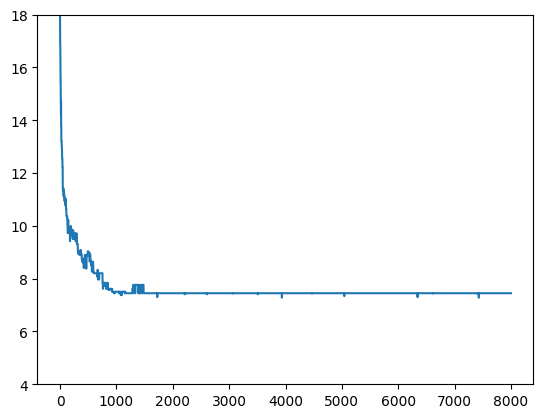

In [15]:
print(plot_lst[len(plot_lst)-1][1])
plot_lst_tp = np.transpose(plot_lst)
#print(plot_lst_tp)
plt.plot(plot_lst_tp[0], plot_lst_tp[1])
plt.ylim(4, 18)


In [17]:
print(len(generation))

40


(0.0, 1.0)

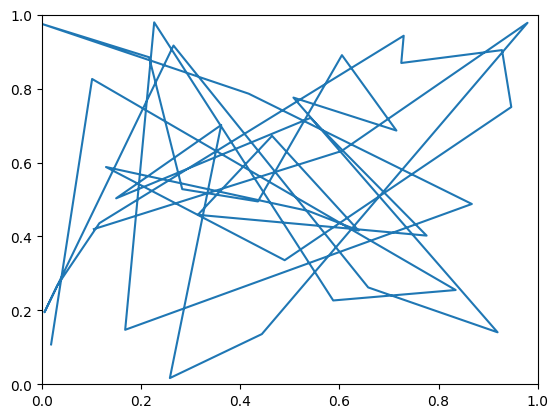

In [12]:
fig2 = plt.figure()
ax = fig.add_subplot()
plt.plot(xPos, yPos)
ax.set_aspect('equal', adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)

最低値の時に、そのchromosomeを保存する。
ブランチ切って機能追加する？

In [13]:
#plot_listの長さだけfor
for n in range(len(plot_lst)):
    print(plot_lst[n][1])


18.067620771389343
17.423665897102794
16.903990546847865
16.903990546847865
16.821712381693477
16.821712381693477
16.449041919577663
16.449041919577663
16.109360474296235
16.034896432174637
15.512792005140474
15.512792005140474
14.916711708554626
14.665703244560559
14.665703244560559
14.560077782296679
14.186940633235096
14.186940633235096
14.752102493720779
13.854531195714484
13.854531195714484
13.854531195714484
13.71338041501009
13.203331429649104
13.203331429649104
13.203331429649104
13.203331429649104
13.203331429649104
13.203331429649104
13.157373062762334
13.058572712263466
13.058572712263466
13.058572712263466
13.058572712263466
12.901277728016883
12.901277728016883
12.814073534068587
12.563188247973988
12.563188247973988
12.563188247973988
12.563188247973988
12.509771802448139
12.509771802448139
12.21342338546643
12.21342338546643
12.21342338546643
12.21342338546643
12.21342338546643
11.43003913175156
11.43003913175156
11.43003913175156
11.334421728048053
11.334421728048053
11